In [1]:
#import libraries
from tensorflow.keras.layers  import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from pathlib import Path
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os



In [160]:
import tensorflow as tf
print(tf.__version__)#if version is less than 2.0 remove from tensorflow.keras and  from keras  import libraries

2.10.0


In [161]:
pwd

'D:\\malaria_prediction\\Dataset\\Test'

#  1.Create VGG19 as a base model transfer learning

In [162]:
'''If you don’t download the weights, you will have to use the architecture to train your model from scratch.
Recall that the base model will usually have more units in the final output layer than you require.
When creating the base model, you, therefore, have to remove the final output layer.
Later on, you will add a final output layer that is compatible with your problem.'''

#global  parameters 
IMG_SIZE=[224,224,3]

train_path=("D:\malaria_prediction\Dataset\Train")
test_path=("D:\malaria_prediction\Dataset\Test")



In [ ]:
# load vgg19  model without classifier layers and specify our new image dataset shape 
#use imagenet weights
vgg19 = VGG19(input_shape=IMG_SIZE, include_top=False,weights="imagenet")


# 2.Freeze layers so they don’t change during training

In [ ]:
'''This is because you don’t want the weights in those layers to be re-initialized.
If they are, then you will lose all the learning that has already taken place.
Hence, no different from training the model from scratch'''

for layer in vgg19.layers:
    layer.trainable = False

In [94]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# 3.Add new trainable layers

In [109]:
''' This will turn old features into predictions on the new dataset. 
This is important because the pre-trained model is loaded without the final output layer.'''

# useful for getting number of output classes
folders =glob("D:\malaria_prediction\Dataset\Train\*")

In [110]:
folders

['D:\\malaria_prediction\\Dataset\\Train\\Parasite',
 'D:\\malaria_prediction\\Dataset\\Train\\Uninfected']

In [112]:
#Add new classifier layers
# use the Keras function API to add a new Flatten layer after the last pooling layer in the VGG19
x = Flatten()(vgg19.output)


# 4.Train the new layers on the dataset

In [113]:
'''pre-trained models trained on the ImageNet dataset will output 1000 classes. 
However,our model might have two classes. In this case, you have to train the model with a new output layer in place. 
Therefore, you will add some new dense layers as you please, but most importantly,
a final dense layer with units corresponding to the number of outputs expected by your model'''

prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# 2.Create Model from scratch using CNN

In [121]:
  

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 64)      

# Compile the model

In [122]:
# tell the model what cost and optimization method to use 
#in this case 2 nodes are required as output
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [164]:

# Use the Image Data Generator to import the images from the dataset
#Applying image augumentatations 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [165]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("D:\malaria_prediction\Dataset\Train", 
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 416 images belonging to 2 classes.


In [166]:
training_set

In [167]:
test_set=test_datagen.flow_from_directory("D:\malaria_prediction\Dataset\Test",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [168]:
test_set

In [140]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
13/13 [==============================] - 37s 3s/step - loss: 0.1585 - accuracy: 0.9447 - val_loss: 0.4051 - val_accuracy: 0.8358
Epoch 2/15
13/13 [==============================] - 37s 3s/step - loss: 0.1392 - accuracy: 0.9519 - val_loss: 0.3694 - val_accuracy: 0.8060
Epoch 3/15
13/13 [==============================] - 36s 3s/step - loss: 0.0965 - accuracy: 0.9712 - val_loss: 0.4050 - val_accuracy: 0.7836
Epoch 4/15
13/13 [==============================] - 36s 3s/step - loss: 0.1800 - accuracy: 0.9399 - val_loss: 0.3224 - val_accuracy: 0.8507
Epoch 5/15
13/13 [==============================] - 38s 3s/step - loss: 0.1207 - accuracy: 0.9591 - val_loss: 0.3412 - val_accuracy: 0.8209
Epoch 6/15
13/13 [==============================] - 35s 3s/step - loss: 0.1154 - accuracy: 0.9543 - val_loss: 0.3700 - val_accuracy: 0.8507
Epoch 7/15
13/13 [==============================] - 36s 3s/step - loss: 0.1163 - accuracy: 0.9688 - val_loss: 0.2983 - val_accuracy: 0.8731
Epoch 8/15
13/13 [==

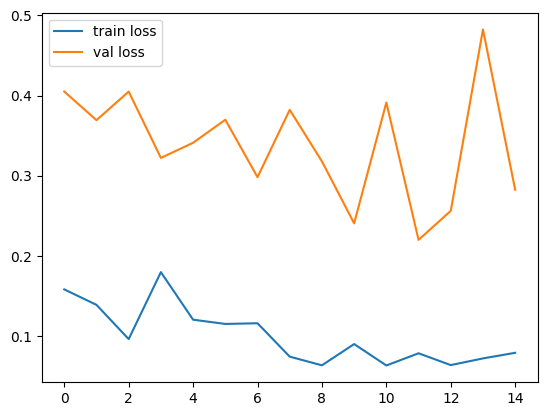

<Figure size 640x480 with 0 Axes>

In [169]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



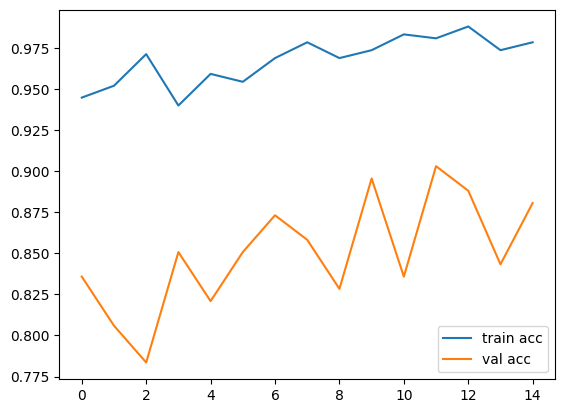

<Figure size 640x480 with 0 Axes>

In [170]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [171]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [172]:
y_pred = model.predict(test_set)

5/5 [==============================] - 2s 306ms/step


In [173]:
y_pred


array([[9.76661205e-01, 2.33387332e-02],
       [2.53480464e-01, 7.46519566e-01],
       [9.99999940e-01, 7.09484663e-13],
       [7.83123225e-02, 9.21687603e-01],
       [9.99999940e-01, 5.74174250e-11],
       [9.99985754e-01, 1.41443161e-05],
       [3.34516093e-02, 9.66548383e-01],
       [9.99999940e-01, 2.23998210e-17],
       [4.92191203e-02, 9.50780809e-01],
       [3.34844850e-02, 9.66515541e-01],
       [7.25693181e-02, 9.27430749e-01],
       [2.67158002e-01, 7.32842028e-01],
       [9.99999940e-01, 2.23472300e-11],
       [9.99586999e-01, 4.13057947e-04],
       [9.99719143e-01, 2.80941807e-04],
       [4.83718775e-02, 9.51628089e-01],
       [5.49068190e-02, 9.45093095e-01],
       [8.26857686e-02, 9.17314231e-01],
       [2.84072846e-01, 7.15927184e-01],
       [6.31680489e-02, 9.36831951e-01],
       [9.99374330e-01, 6.25651970e-04],
       [2.96799839e-02, 9.70320046e-01],
       [9.99747992e-01, 2.52015830e-04],
       [1.30571783e-01, 8.69428277e-01],
       [7.688067

In [174]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [175]:
y_pred


array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0], dtype=int64)

In [184]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [188]:
model=load_model('model_vgg19.h5')

In [194]:
img=image.load_img('D:\\malaria_prediction\\Dataset\\Train\\Uninfected\\C1_thinF_IMG_20150604_104722_cell_66.PNG',target_size=(224,224))

In [195]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [196]:
x.shape

(224, 224, 3)

In [198]:
#rescaling 
x=x/255

In [199]:
#expanding dimension
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [203]:
model.predict(img_data)

1/1 [==============================] - 0s 80ms/step


array([[1., 0.]], dtype=float32)

In [204]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 55ms/step


In [205]:
if(a==1):
    print("infected")
else:
    print("uninfected")

unfected
